In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Import countries shapefile
fp = os.path.join('data6','ne_50m_admin_0_countries','ne_50m_admin_0_countries.shp')
countries = gpd.read_file(fp)
countries.columns = countries.columns.str.lower()  # Simplify column names
countries = countries[['admin', 'type', 'geometry']]
countries.head(3)

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."


In [3]:
# Import Arctic communities GeoJSON directly from URL
URL = 'https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4'
communities = gpd.read_file(URL)
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


In [4]:
# Import country names from URL
URL = 'https://raw.githubusercontent.com/MEDS-eds-220/MEDS-eds-220-course/refs/heads/main/book/chapters/lesson-12-merge-data/country_names.csv'
country_names = pd.read_csv(URL)
country_names

,country,admin
0,RU,Russia
1,LV,Latvia
2,EE,Estonia
3,LT,Lithuania
4,SE,Sweden
5,BY,Belarus
6,FI,Finland
7,NO,Norway
8,DK,Denmark
9,FO,Faroe Islands


The crs of the communities geodataframe is EPSG:4326 because all geojasent files are given in this crs

In [6]:
communities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
countries.crs == communities.crs

True

sicne crss match we can plot them together 

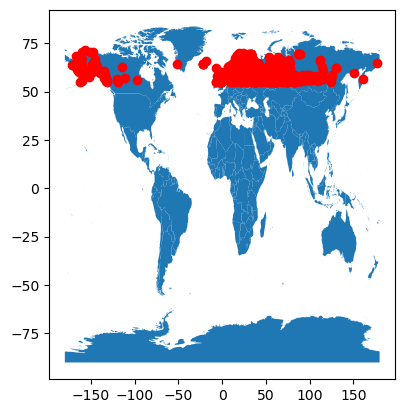

In [9]:
fig, ax = plt.subplots()
countries.plot(ax=ax)
communities.plot(ax=ax, color='red')
plt.show()

## Artic comunities by country

In [ ]:
#number of artic comunites by country
# Create data frame with number of communities per country
# Create data frame with number of communities per country
n_comms = (communities.groupby('country')
                      .size()
                      .reset_index(name='n_communities'))
n_comms

,country,n_communities
0,AX,1
1,BY,8
2,CA,7
3,DK,72
4,EE,14
5,FI,98
6,FO,1
7,GB,96
8,GL,1
9,IS,5


## if else statements

Our goal is to merge the n_comms and the countries data frames. To merge two data frames they need to have at least one column in common. Currently our datasets do not have any columns in common:



In [15]:
set(countries.columns).intersection(n_comms.columns)

set()

In [ ]:
comma_columns = set(countries.columns).intersection(n_comms.columns)

# Check if there are any common columns
if len(common_columns) != 0:
    print(f"Common columns: {common_columns}")
else:
    print("No common columns")

Index(['admin', 'type', 'geometry'], dtype='object')

## Check in
wrap the previous code into a function called 'check_common_columns' prints a message depending on whether two genreal daatframes have column names in common.

command + / = comment out
command + ] = move indent 

In [29]:
# new vairables df1, df2
"""
Prints message deending on wehter df1 and df2 have collumns in comon.
"""
def check_common_columns(df1, df2):
    common_columns = set(df1.columns).intersection(df2.columns)
    if len(common_columns) != 0:
        print(f"Common columns: {common_columns}")
    else:
        print("No common columns")

In [30]:
?check_common_columns

Signature: check_common_columns(df1, df2)
Docstring: <no docstring>
File:      /var/folders/8z/40nhxmfn79g4mlff7s8ylh_c0000gn/T/ipykernel_2460/3563780948.py
Type:      function

## merging data fames
we want to 
1. use the country_names dataframe to add the country names to n_coms
2. merge the resulting data frame with country_names

merge datfrmaes we can use pandas.merge() funcion:

```python
output_df = pd.merge(left_df,
                     right_df, 
                     how = type_of_join,  # type of join, defualt = inner join
                     on = column_to_join) # which column to join on, must be in both dfs
```

In [27]:
n_comms = pd.merge(n_comms,
                   country_names,
                   how='left',
                   on='country')
n_comms

,country,n_communities,admin
0,AX,1,Aland Islands
1,BY,8,Belarus
2,CA,7,Canada
3,DK,72,Denmark
4,EE,14,Estonia
5,FI,98,Finland
6,FO,1,Faroe Islands
7,GB,96,United Kingdom
8,GL,1,Greenland
9,IS,5,Iceland


In [31]:
check_common_columns(n_comms, countries)

Common columns: {'admin'}


# check in
create a new variable callled artic_countries whihc is the result of an anner join between our countries and n_comms dfs

In [41]:

artic_countries = pd.merge(countries,
                   n_comms,
                   how='inner',
                   on='admin')
artic_countries

,admin,type,geometry,country,n_communities
0,United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
1,United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
2,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
3,Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
4,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
5,Lithuania,Sovereign country,"MULTIPOLYGON (((20.95781 55.27891, 20.89980 55...",LT,26
6,Latvia,Sovereign country,"POLYGON ((26.59355 55.66753, 26.54287 55.67241...",LV,25
7,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
8,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
9,Estonia,Sovereign country,"MULTIPOLYGON (((27.35195 57.52812, 27.32656 57...",EE,14


In [36]:
country_names

,country,admin
0,RU,Russia
1,LV,Latvia
2,EE,Estonia
3,LT,Lithuania
4,SE,Sweden
5,BY,Belarus
6,FI,Finland
7,NO,Norway
8,DK,Denmark
9,FO,Faroe Islands


checking the result we notice we lost the aland isalnds. lets double check it.

In [42]:
# Update index
artic_countries = artic_countries.set_index("admin")
artic_countries.head()

,type,geometry,country,n_communities
admin,,,,
United States of America,Country,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",US,115
United Kingdom,Country,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...",GB,96
Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
Russia,Sovereign country,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...",RU,774
Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48


In [43]:
#check aland islands is nowhwere in df
'Aland Islands' in artic_countries.values

False

the aland isalnds is an automous region of finland and ther is on eartic commonity regidtreed in this region we will dereectly add one to finladn to account for this

In [44]:
artic_countries.at["Finland", 'n_communities']

98

In [53]:
artic_countries.at["Finland", 'n_communities'] += 1

In [54]:
artic_countries.at["Finland", 'n_communities']

106

<Axes: >

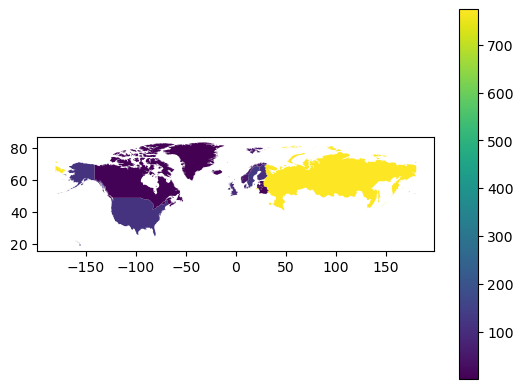

In [56]:
artic_countries.plot(column='n_communities',
                      legend=True)

## reprojecting 

to_crs mehtod for geopandas.gerdataframes

'''python
updated_geodf = geodf.to_crs(new_crs)
'''

here new_crs is the crs want to covert to, this is an object of type crs or a string repesenting the crs

In [60]:
# Reproject to CRS optimized for Arctic region
artic_countries = artic_countries.to_crs('epsg:3413')


<Axes: >

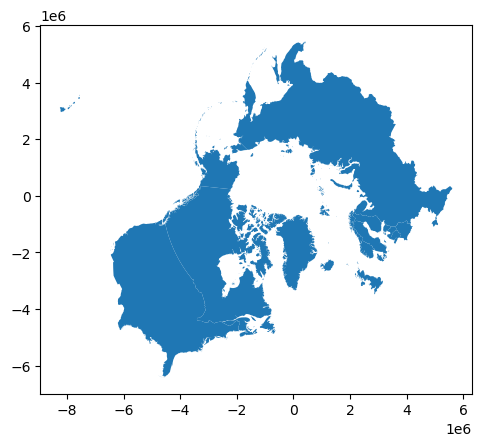

In [61]:
artic_countries.plot()

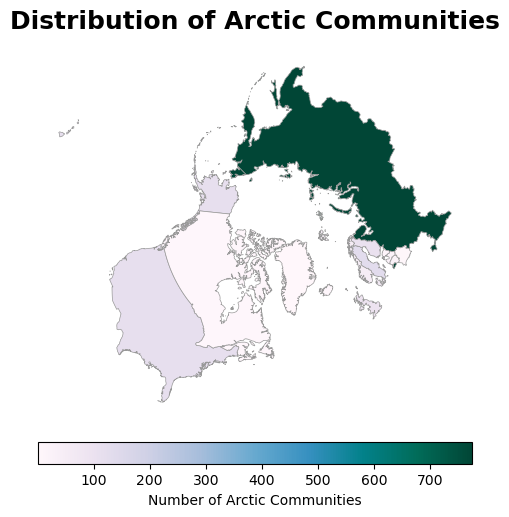

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
artic_countries.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()